In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from scipy.stats import ttest_ind

from PIL import Image
from io import BytesIO
import cv2

In [3]:
df = pd.read_csv("../data/train_cat_or_dog.csv")
df.head()

,Unnamed: 0,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,cat,dog
0,0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,0,1
1,1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,0,0
2,2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,0,1
3,3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,0,1
4,4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,0,1


In [13]:
feature_columns = ['Subject Focus', 'Eyes', 'Face', 'Near', #'Action',
           'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 
           'Info', 'Blur', 'cat', 'dog']
target_column = 'Pawpularity'
print(len(feature_columns))

13


In [29]:
buckets = df[target_column].map(lambda t: round(np.sqrt(t)))
buckets.describe()

count    9912.000000
mean        5.922215
std         1.674653
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Pawpularity, dtype: float64

5.922215496368039
6.0


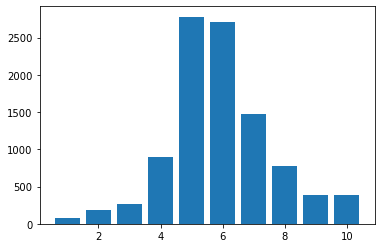

In [30]:
plt.bar(buckets.unique(), buckets.value_counts()[buckets.unique()])
print(buckets.mean())
print(buckets.median())

KeyError: '[0] not in index'

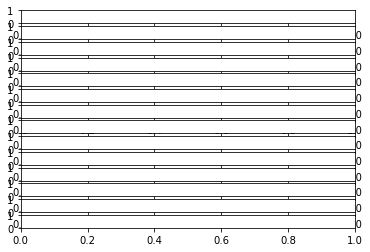

In [23]:
fig, axes = plt.subplots(14,1)

i = 0
for column in feature_columns:
    axes[i].bar(buckets.unique(), buckets[df[column] == 1].value_counts()[buckets.unique()])
    axes[i].set_title(column)
    i += 1